In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [12]:
data = pd.read_csv("liver.csv")

In [13]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
574,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
575,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
576,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
577,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


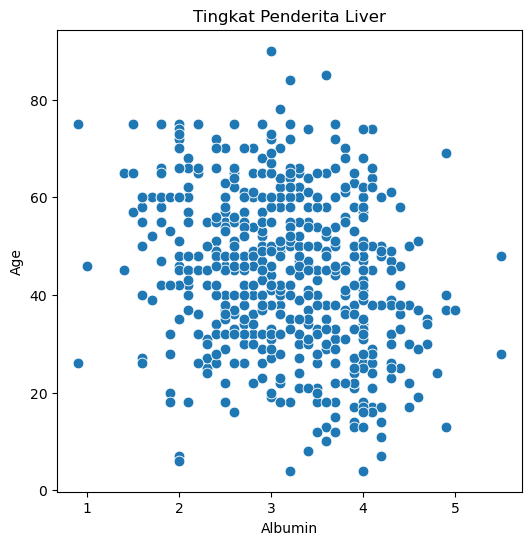

In [14]:
#persebaran data
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'Albumin', y = 'Age', data = data, s = 60)
plt.title('Tingkat Penderita Liver')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
for col in ["Age", "Gender"]:
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])

In [16]:
data_encoded = pd.get_dummies(data, columns=['Age'])

data_numerical = data_encoded.fillna(data_encoded.mean())

data_numerical.replace([np.inf, -np.inf], np.nan, inplace=True)
data_numerical.fillna(data_numerical.mean(), inplace=True)

wcss = []

for i in range(1, 11):
    kmModel = KMeans(n_clusters=i, n_init=10)
    kmModel.fit(data_numerical)
    wcss.append(kmModel.inertia_)

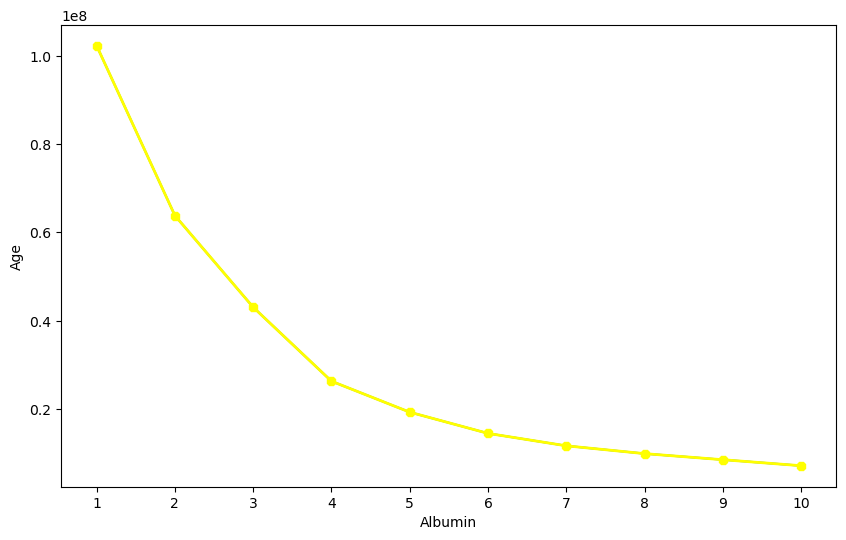

In [17]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth = 2, color = 'Yellow', marker = '8')
plt.xlabel("Albumin")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Age")
plt.show()

In [18]:
kmModelFix = KMeans (n_clusters = 5, n_init = 10) # n_init = 10 / n_init = 'auto'
kmModelFix.fit(data)

hasil_prediksi = kmModelFix.predict(data)
hasil_prediksi

array([0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4,
       4, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 4, 3, 3, 1, 2, 2, 0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 4, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 4, 4, 0, 2, 4, 0, 0, 0,
       4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 4, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 4, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
data['Label'] = hasil_prediksi
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Label
0,58,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,55,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1,4
2,55,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1,4
3,52,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0
4,64,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0


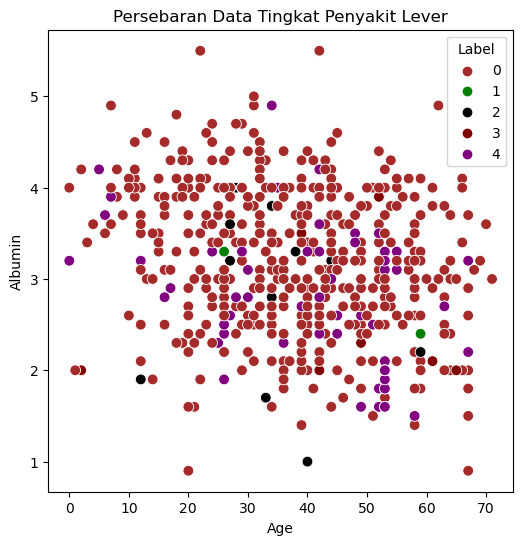

In [22]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'Age', y = 'Albumin', hue = 'Label',
                palette = ['brown', 'green', 'black', 'Maroon', 'purple'], legend = 'full', data = data, s=60)
plt.title('Persebaran Data Tingkat Penyakit Lever')
plt.show()